# The Prevalence of Obesity in Juveniles in Beaufort County Schools

Childhood Obesity is a serious problem in the United States. According to the [CDC](https://www.cdc.gov/obesity/data/childhood.html), The percentage of children and adolescents (ages 2-19) in 2017-2018 was 19.3%. It is also stated that obesity is more common in certain populations. The prevalence among Hispanic children was 25.6%, 24.2% among Black children, 16.1% among White children, and 8.7% among Asian children. This project will look at data that was collected in Beaufort County schools and analyze the prevalence of overweight and obese children, but more specifically focused on obese. Although, there are health risks associated with being overweight, obesity is considered a disease with greater health risks. The goal is to analyze if the prevalence is correlated with specific populations and also if the socioeconomic status has any correlation.

An individual is determined to be overweight by calculating the BMI. It can be calculated in one of two ways:

|Measurements Units                   |Formula                         |
|-------------------------------------|--------------------------------|
|Kilograms and meters (or centimeters)|weight(kg)/ [height(m)]^2       |
|Pounds and inches                    |weight(lb)/ [height(in)]^2 x 703|


The [BMI calculation](https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html#:~:text=How%20is%20BMI%20calculated%3F,-BMI%20is%20calculated&text=With%20the%20metric%20system%2C%20the,to%20obtain%20height%20in%20meters.) is the same for adults and children, but is interpreted differently for children. Children and teen's BMI is interpreted by using a [Percentile chart](https://www.cdc.gov/healthyweight/assessing/bmi/childrens_bmi/about_childrens_bmi.html) after the BMI is calculated. The BMI percentile is age-specific and sex-speific.

**BMI PERCENTILES CHART**  
<img src='BMI Percentile Chart.png'> 

|Weight Status Category|Percentile Range                               |
|----------------------|-----------------------------------------------|
|Underweight           |Less than the 5th percentile                   |
|Healthy Weight        |5th percentile to less than the 85th percentile|
|Overweight            |85th to less than the 95th percentile          |
|Obese                 |Equal to or greater than the 95th percentile   |

**This project will answer the following questions:**
* Are children who are obese children more prevalent among certain ethnic groups in Beaufort County?
* Does the Socioeconomic status have any correlation to having a higher prevalence of obesity?

## Import Data Set
To start answering these questions, the excel data set will be imported using Pandas **read_excel()** function

In [350]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
import random
import os

# Allows plots to be shown in jupyter notebooks
%matplotlib inline

# file path
path = 'C:/Users/DDR33/Software/Jupyter/Portfolio/Obesity Project'
os. chdir(path)

# Read in excel file
data = pd.read_excel('BMI Data - Beaufort County Schools (2013-2014).xlsx', engine='openpyxl')
data.head(10)

,GRADE_LEVEL,DOB,AGE,ETHNICITY,GENDER,LUNCHSTATUS,HEIGHT,WEIGHT,BMI,BMI %
0,1,2007-01-12,7,B,F,F,52.50,66.0,16.83,67.7
1,1,2006-10-30,7,W,F,F,53.00,62.0,15.52,40.2
2,1,2007-05-10,7,W,F,R,51.75,66.6,17.48,78.7
3,2,2006-06-28,8,B,F,R,48.00,51.4,15.68,40.7
4,2,2006-01-13,8,B,F,F,47.00,132.0,42.01,99.8
5,2,2005-09-21,9,B,F,F,47.83,84.0,25.81,98.2
6,2,2006-05-04,8,B,F,F,47.24,48.5,15.28,30.6
7,2,2004-06-16,10,H,F,F,49.50,64.0,18.36,65.5
8,2,2006-04-20,8,W,F,P,49.21,50.0,14.52,15.5
9,2,2005-12-02,8,H,F,F,48.03,49.0,14.93,20.4


## Data Set Information

This data was collected in 2013-2014 from various schools across Beaufort County. It contains all the necessary columns that will be needed for the analysis.

|Column      |Description                                                                                          |
|------------|-----------------------------------------------------------------------------------------------------|
|GRADE_LEVEL |The grade the student was in at time of recording                                                    |
|DOB         |The student's date of birth                                                                          |
|AGE         |The age of the student at the time of recording                                                      |
|ETHNICITY   |The ethnic social group the student belongs to                                                       |
|GENDER      |The gender of the student                                                                            |
|LUNCH STATUS|The code of how the student receives their lunch. The lunch could be P(PAID), R(REDEUCED), or F(FREE)|
|HEIGHT      |The height at time of recording                                                                      |
|WEIGHT      |The weight at time of recording                                                                      |
|BMI         |The BMI calculated from the height and weight at time of recording                                   |
|BMI %       |The BMI Percentile calculated using the BMI and the Percentile chart at time of recording            |

## Clean Data

After the data set is imported, it needs to be cleaned to accurately answer the questions.

In [351]:
# Add a generated student ID
data['student'] = 0
data['student'] = data['student'].apply(lambda x: x + random.randrange(0, data.shape[0]))

# Convet columns to snake case
data.columns = data.columns.str.lower()
data.rename(columns={'bmi %': 'bmi_percentile'}, inplace=True)

# Confirm the missing values in each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8119 entries, 0 to 8118
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   grade_level     8119 non-null   int64         
 1   dob             8119 non-null   datetime64[ns]
 2   age             8119 non-null   int64         
 3   ethnicity       8119 non-null   object        
 4   gender          8119 non-null   object        
 5   lunchstatus     8119 non-null   object        
 6   height          8036 non-null   float64       
 7   weight          8032 non-null   float64       
 8   bmi             8028 non-null   float64       
 9   bmi_percentile  8030 non-null   object        
 10  student         8119 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 697.9+ KB


The columns **height**, **weight**, **bmi**, and **bmi %** are the only columns that have null values. Since the **bmi** is calculated using the height and weight, it would makes sense that any rows where either the **height** or **weight** are missing, the **bmi** would have a null value.

The next step would be to check which grades are missing height and weight values to see if any of the grades should be excluded from the analysis.

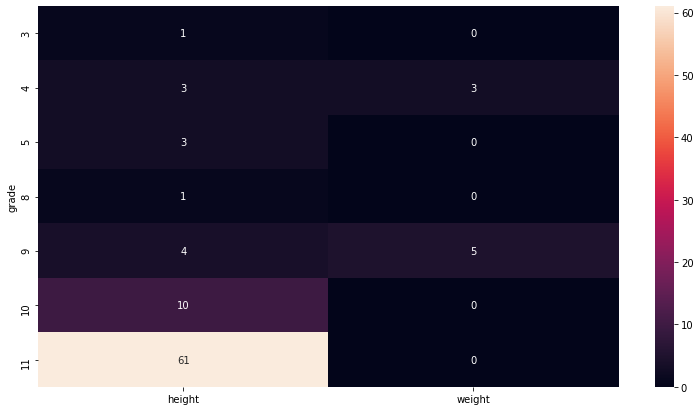

In [355]:
# Empty list that will contain the unique grades that are missing measurements
grades = []

# Check which grade have null values
for i, r in data.iterrows():
    if pd.isna(r['height']) | pd.isna(r['weight']):
        grades.append(r['grade_level'])
        
# Store the the unique grades in the list
grades = np.unique(grades)

# Empty DataFrame that will store how many missing height and weight values there are for each grade
null_count = pd.DataFrame(index=grades, columns=['height', 'weight']).fillna(0)
null_count.index.name = 'grade'

# Count how many missing values in each grade
for i, r in data.iterrows():
    if pd.isna(r['height']):
        null_count.loc[r['grade_level'], 'height'] += 1
    elif pd.isna(r['weight']):
        null_count.loc[r['grade_level'], 'weight'] += 1

fig = plt.figure(figsize=(13,7))
ax = sns.heatmap(null_count, annot=True)

**Number of Recorded Students in Each Grade**

In [7]:
data['grade_level'].value_counts()

9     1520
4     1227
5     1195
3     1165
8     1132
6      956
10     323
7      303
2      147
11     103
12      40
99       5
1        3
Name: grade_level, dtype: int64

**Grades that need to be excluded from the analysis**

After looking at the number of recorded students in each grade and the number of missing measurements, certain grades can be excluded from the analysis.

* **11** - There are 103 total students recorded in this data set for the 11th grade. 61 out of the 103 are missing height values.
* **99** - This could be a typo and there are only 5 students with the grade 99.
* **1** - There are only 3 recorded students in the 1st grade

Since the 11th grade is excluded and grades 3rd-8th barely have missing values in relation to the number of recorded students; It is best to do the analysis on Elementary and Middle school children. The 1st grade will be excluded since there are only 3 recorded students. 

The next step is add description columns to **ethnicity**, **gender**, and **lunch status** and filter out unnecessary grades.

In [8]:
# Add description columns for the ethinicty, lunch status, and gender codes
data['ethnicity_descr'] = data['ethnicity'].apply(lambda code: 'BLACK' if code == 'B' else ('WHITE' if code == 'W' else 'HISPANIC'))
data['lunchstatus_descr'] = data['lunchstatus'].apply(lambda code: 'PAID' if code == 'P' else ('REDUCED' if code == 'R' else 'FREE'))
data['gender_descr'] = data['gender'].apply(lambda code: 'MALE' if code == 'M' else 'FEMALE')

data.head()

,grade_level,dob,age,ethnicity,gender,lunchstatus,height,weight,bmi,bmi_percentile,student,ethnicity_descr,lunchstatus_descr,gender_descr
0,1,2007-01-12,7,B,F,F,52.50,66.0,16.83,67.7,7825,BLACK,FREE,FEMALE
1,1,2006-10-30,7,W,F,F,53.00,62.0,15.52,40.2,7424,WHITE,FREE,FEMALE
2,1,2007-05-10,7,W,F,R,51.75,66.6,17.48,78.7,2872,WHITE,REDUCED,FEMALE
3,2,2006-06-28,8,B,F,R,48.00,51.4,15.68,40.7,1623,BLACK,REDUCED,FEMALE
4,2,2006-01-13,8,B,F,F,47.00,132.0,42.01,99.8,1919,BLACK,FREE,FEMALE


In [9]:
# filter out unecessary columns
bmi_data = data[['student', 'grade_level', 'dob', 'age', 'ethnicity_descr', 'gender_descr', 'lunchstatus_descr', 'height', 'weight', 'bmi', 'bmi_percentile']]

# Filter out unecessary grade levels
bmi_data = bmi_data[(bmi_data['grade_level'] != 1)  &
                    (bmi_data['grade_level'] != 9)  &
                    (bmi_data['grade_level'] != 10) &
                    (bmi_data['grade_level'] != 11) &
                    (bmi_data['grade_level'] != 12) &
                    (bmi_data['grade_level'] != 99)]

# filter out the rows with null values in height or weight
bmi_data = bmi_data[(bmi_data['height'].notna()) & (bmi_data['weight'].notna())]
bmi_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6114 entries, 3 to 6127
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   student            6114 non-null   int64         
 1   grade_level        6114 non-null   int64         
 2   dob                6114 non-null   datetime64[ns]
 3   age                6114 non-null   int64         
 4   ethnicity_descr    6114 non-null   object        
 5   gender_descr       6114 non-null   object        
 6   lunchstatus_descr  6114 non-null   object        
 7   height             6114 non-null   float64       
 8   weight             6114 non-null   float64       
 9   bmi                6114 non-null   float64       
 10  bmi_percentile     6114 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 573.2+ KB


The grades that are considered high school(9-12) were filtered out, and any rows where the measurements for height and weight are missing. The total number of rows in each column now all match.

The next step is to analyze the **bmi %** column. Since the bmi percentile is calculated from the bmi, the column type should be **float** like the height, weight, and bmi columns. Since it is an **object** type, there are errors in some of the calculations.

In [10]:
bmi_errors = bmi_data[bmi_data['bmi_percentile'].apply(lambda x: type(x) == str)]
bmi_errors

,student,grade_level,dob,age,ethnicity_descr,gender_descr,lunchstatus_descr,height,weight,bmi,bmi_percentile
1848,5338,4,2003-10-21,10,BLACK,FEMALE,FREE,5.00,84.50,2376.14,Ht or wt error
1889,3169,4,2004-06-30,10,BLACK,FEMALE,FREE,76.00,60.00,7.30,Ht or wt error
2289,7642,4,2004-08-09,10,WHITE,MALE,FREE,61.00,52.25,9.87,Ht or wt error
2441,2641,4,2004-05-13,10,WHITE,MALE,FREE,59.50,53.00,10.52,Ht or wt error
3295,5444,5,2003-05-10,11,BLACK,MALE,FREE,57.75,48.00,10.12,Ht or wt error
3591,5502,5,2003-04-22,11,HISPANIC,MALE,REDUCED,65.00,53.25,8.86,Ht or wt error
3650,1348,5,2002-12-03,11,HISPANIC,MALE,FREE,59.00,53.00,10.70,Ht or wt error
5014,7385,8,2098-08-06,16,WHITE,FEMALE,PAID,67.00,123.00,19.26,Age error
5040,1474,8,2098-12-29,15,WHITE,FEMALE,PAID,63.50,113.00,19.70,Age error


The data was filtered to show the rows where the BMI percentile was of the **str** type. Since there are not many rows where the BMI percentile was not calculated, these rows can be removed for the analysis. The rows where the **BMI %** was not calculated were saved to **bmi_errors** along with index of each row in relation to the index location that they are at in the data set. The **drop** function can be used to remove the specific rows at the index locations in the **bmi_errors** DataFrame. 

In [11]:
bmi_data = bmi_data.drop(index=bmi_errors.index, axis=0).reset_index(drop=True)
bmi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6105 entries, 0 to 6104
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   student            6105 non-null   int64         
 1   grade_level        6105 non-null   int64         
 2   dob                6105 non-null   datetime64[ns]
 3   age                6105 non-null   int64         
 4   ethnicity_descr    6105 non-null   object        
 5   gender_descr       6105 non-null   object        
 6   lunchstatus_descr  6105 non-null   object        
 7   height             6105 non-null   float64       
 8   weight             6105 non-null   float64       
 9   bmi                6105 non-null   float64       
 10  bmi_percentile     6105 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 524.8+ KB


Looking at the DataFrame info, the number of rows is now 6105 compared to the 6114 rows there were before dropping the rows. The data set is now cleaned and ready for analysis.

## Analysis

The analysis will focus on elementary and middle school children (Grades 2-8).

A BMI category column will now be created to classify each student in the respective BMI category. 

In [12]:
bmi_cat_order = ['UNDERWEIGHT', 'NORMAL', 'OVERWEIGHT', 'OBESE'] # Order which each chart will display the data
chart_colors = ['salmon', 'g', 'gold', 'r'] # Colors for each chart

In [13]:
# Add BMI categories
bmi_data['bmi_status'] = bmi_data['bmi_percentile'].apply(lambda bmi: 'UNDERWEIGHT' if bmi < 5 else 
                                                            ('NORMAL' if  5 <= bmi < 85 else 
                                                            ('OVERWEIGHT' if 85 <= bmi < 95 else
                                                             'OBESE')))
bmi_data.head()

,student,grade_level,dob,age,ethnicity_descr,gender_descr,lunchstatus_descr,height,weight,bmi,bmi_percentile,bmi_status
0,1623,2,2006-06-28,8,BLACK,FEMALE,REDUCED,48.00,51.4,15.68,40.7,NORMAL
1,1919,2,2006-01-13,8,BLACK,FEMALE,FREE,47.00,132.0,42.01,99.8,OBESE
2,905,2,2005-09-21,9,BLACK,FEMALE,FREE,47.83,84.0,25.81,98.2,OBESE
3,1152,2,2006-05-04,8,BLACK,FEMALE,FREE,47.24,48.5,15.28,30.6,NORMAL
4,3962,2,2004-06-16,10,HISPANIC,FEMALE,FREE,49.50,64.0,18.36,65.5,NORMAL


### General Census

Now that the BMI category has been created, a count of how many students in each category will be done. This will give a better sense of the data. Also, plots will be generated showing the data.

**Total Students by BMI Category**

### Data

In [16]:
bmi_cat = bmi_data.pivot_table('student', index='bmi_status', aggfunc='count').reset_index()
bmi_cat['bmi_status'] = pd.Categorical(bmi_cat['bmi_status'], categories=bmi_cat_order)
bmi_cat = bmi_cat.sort_values(by='bmi_status').reset_index(drop=True)
bmi_cat

,bmi_status,student
0,UNDERWEIGHT,398
1,NORMAL,4058
2,OVERWEIGHT,854
3,OBESE,795


### Plot

Text(0, 0.5, 'Students')

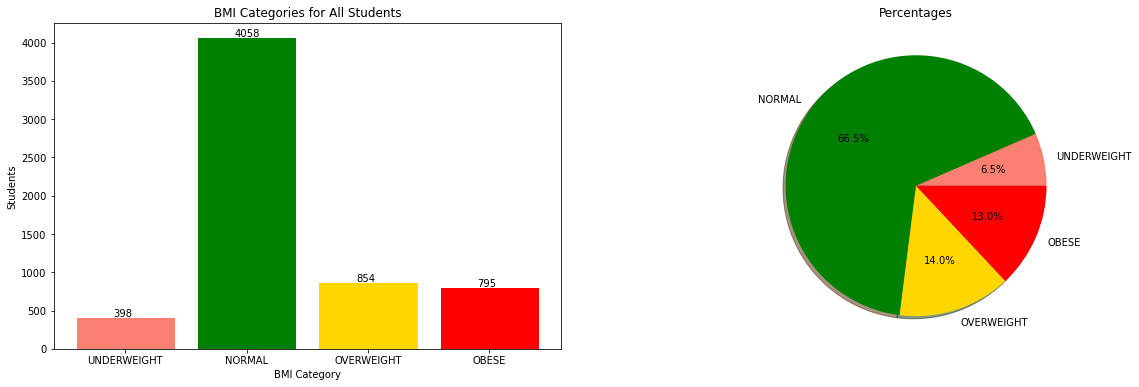

In [365]:
# Create Figure that the plots will be stored in
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))

x_val = bmi_cat['student']

###########
# Chart 1 #
###########

# Bar plot
fig1 = ax1.bar([1, 2, 3, 4], x_val)

# Set colors for each bar
for i, r in enumerate(fig1):
    fig1[i].set_color(chart_colors[i])
    
# Set x ticks
ax1.set_xticks([1, 2, 3, 4])
ax1.set_xticklabels(bmi_cat_order)

# Show bar values
for i, v in enumerate(x_val):
    ax1.text((i+1)-0.1, v+26, str(v))

# Set Titles
ax1.set_title('BMI Categories for All Students')
ax2.set_title('Percentages')

###########
# Chart 2 #
###########

# Pie Chart
fig2 = ax2.pie(bmi_cat['student'], labels=bmi_cat['bmi_status'], autopct='%1.1f%%', shadow=True)

# Set colors for each pie wedge
for i, pie_wedge in enumerate(fig2[0]):
    pie_wedge.set_facecolor(chart_colors[i])
    
# Add X and Y axis labels
ax1.set_xlabel('BMI Category')
ax1.set_ylabel('Students')

Out of the all the students 27% of the children are obese and overweight. To answer the first question - if the prevalence of overweight and obese children more common among certain ethnic groups - the data set needs to be filtered for only students that are obese and overweight

### Data

In [21]:
# Copy the data set 
oo_bmi_data = bmi_data.copy()

# Filter data set for only overweight and obese
oo_bmi_data = oo_bmi_data[(oo_bmi_data['bmi_status'] == 'OVERWEIGHT') |
                          (oo_bmi_data['bmi_status'] == 'OBESE')]

# Group the data set by ethnicity and bmi
ethnicity = oo_bmi_data.pivot_table(values='student', index=['ethnicity_descr', 'bmi_status'], aggfunc='count').reset_index()
ethnicity

,ethnicity_descr,bmi_status,student
0,BLACK,OBESE,307
1,BLACK,OVERWEIGHT,228
2,HISPANIC,OBESE,274
3,HISPANIC,OVERWEIGHT,317
4,WHITE,OBESE,214
5,WHITE,OVERWEIGHT,309


### Plot

Text(0.5, 1.0, 'Percentage of Obese')

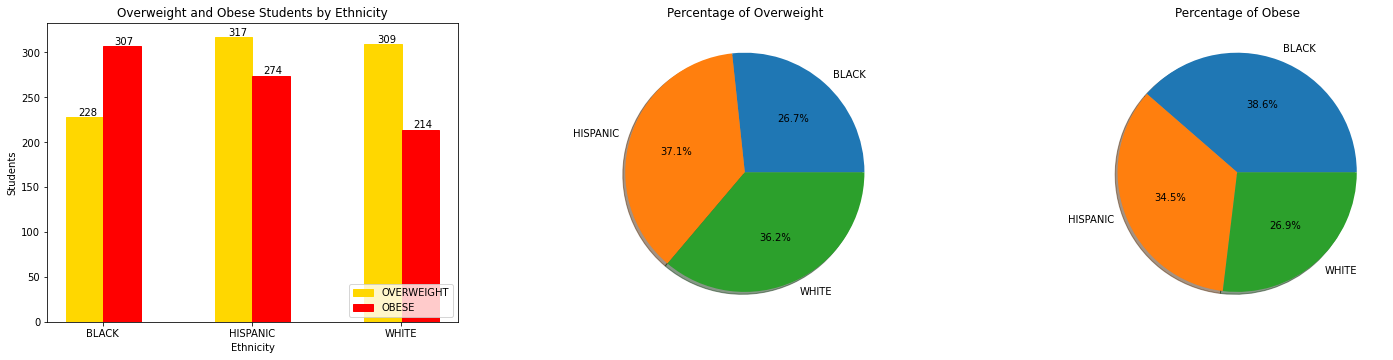

In [367]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25,5.5))

overweight = (ethnicity[ethnicity['bmi_status'] == 'OVERWEIGHT']['student'])
obese = (ethnicity[ethnicity['bmi_status'] == 'OBESE']['student'])

###########
# Chart 1 #
###########

N = 3
ind = np.arange(N)
width = 0.25

plot1 = ax1.bar(ind, overweight, width=0.25, label='OVERWEIGHT')

# Set colors for each bar
for i, r in enumerate(plot1):
    plot1[i].set_color('gold')
    
# Show bar values
for i, v in enumerate(overweight):
    ax1.text(i-0.04, v+2, str(v))
    
plot2 = ax1.bar(ind+width, obese, width=0.25, label='OBESE')

# Set colors for each bar
for i, r in enumerate(plot2):
    plot2[i].set_color('red')
    
# Show bar values
for i, v in enumerate(obese):
    ax1.text(i+0.2, v+2, str(v))

# Set x ticks
ax1.set_xticks([0.12, 1.12, 2.12])
ax1.set_xticklabels(['BLACK', 'HISPANIC', 'WHITE'])

# Figure Appearence

# Title
ax1.set_title('Overweight and Obese Students by Ethnicity')

# Show legend
ax1.legend(loc='lower right')

# Add X and Y axis label
ax1.set_xlabel('Ethnicity')
ax1.set_ylabel('Students')

###########
# Chart 2 #
###########

# Pie Chart
plot3 = ax2.pie(overweight, labels=['BLACK', 'HISPANIC', 'WHITE'], autopct='%1.1f%%', shadow=True)

# Set Title
ax2.set_title('Percentage of Overweight')

###########
# Chart 3 #
###########

# Pie Chart
plot3 = ax3.pie(obese, labels=['BLACK', 'HISPANIC', 'WHITE'], autopct='%1.1f%%', shadow=True)

# Set Title
ax3.set_title('Percentage of Obese')

Looking at the chart, Black and Hispanic children have the highest prevalence of obesity. According to the CDC's article [Racial and Ethnic Disparities in Adult Obesity in the United States](https://www.cdc.gov/pcd/issues/2019/18_0579.htm), non-Hispanic Black Adults have the highest prevalence of obesity with 38.4% overall, followed by Hispanic adults at 32.6%. It is very interesting to see the data of children correlate with CDC's research of minorities having a higher obesity prevalence. The factors that are attributing to this are social and economic. The economic aspect will be analyzed in this dateset later in the project.

The next aspect to analyze are children that are overweight. Even though White and Hispanic children have the highest number of overweight, another question that can be answered is how many in each ethnic group are closer to being obese. 

To answer this question, overweight is going to be classified into 3 categories:

|Overweight Category  |Description                           |
|---------------------|--------------------------------------|
|Slightly Overweight  |BMI Percentile 85 to less than 88.3   |
|Moderately Overweight|BMI Percentile 88.3 to less than 91.6 |
|BORDERLINE OBESE     |BMI Percentile 91.6 to less than 95   |


### Data

In [218]:
# Filter data only for overweight
overweight_data = oo_bmi_data[oo_bmi_data['bmi_status'] == 'OVERWEIGHT'].copy()

# Add Overweight Category
overweight_data['overweight_cat'] = overweight_data['bmi_percentile'].apply(lambda percentile: 'SLIGHTY OVERWEIGHT' if 85 <= percentile < 88.3 else
                                                                                               ('MODERATELY OVERWEIGHT' if 88.3 <= percentile < 91.6
                                                                                               else 'BORDERLINE OBESE'))
# Aggregate data
ethnicity_o = overweight_data.pivot_table('student', ['ethnicity_descr', 'overweight_cat'], aggfunc='count').reset_index()
ethnicity_o

# Add Percentages
e = ethnicity_o['ethnicity_descr'].unique() # Unique lists of ethnicities
p = [] # List that will store percentages

for i in e:
    p.append(round(ethnicity_o[ethnicity_o['ethnicity_descr'] == '{}'.format(i)]['student']/
                  (ethnicity_o[ethnicity_o['ethnicity_descr'] == '{}'.format(i)]['student'].sum())*100,
                  2))
    
ethnicity_o['percentage'] = pd.Series(p).apply(pd.Series).stack().reset_index(drop=True)

### Plot

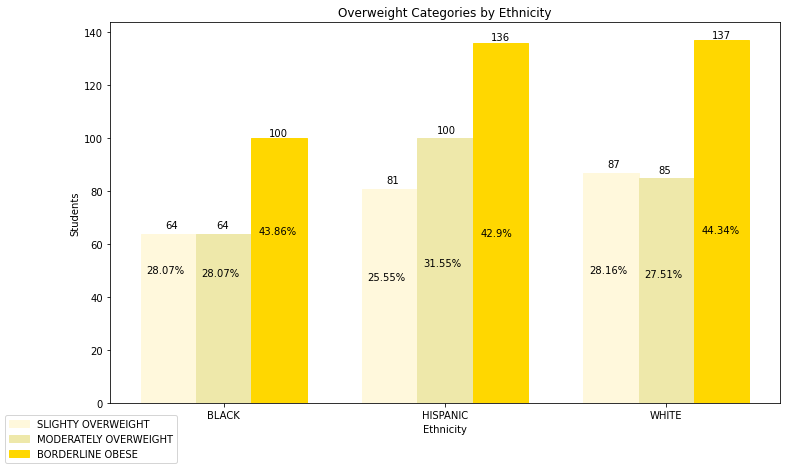

In [362]:
# Create figure
fig = plt.figure(figsize=(12,7))

N = 3
ind = np.arange(N)
width = 0.25

s_o = ethnicity_o[ethnicity_o['overweight_cat'] == 'SLIGHTY OVERWEIGHT']['student'] # Slightly Overweight
so_p = ethnicity_o[ethnicity_o['overweight_cat'] == 'SLIGHTY OVERWEIGHT']['percentage'] # Slight Overweight percentage
m_o = ethnicity_o[ethnicity_o['overweight_cat'] == 'MODERATELY OVERWEIGHT']['student'] # Moderately Overweight
mo_p = ethnicity_o[ethnicity_o['overweight_cat'] == 'MODERATELY OVERWEIGHT']['percentage'] # Moderately Overweight percentage
b_o = ethnicity_o[ethnicity_o['overweight_cat'] == 'BORDERLINE OBESE']['student'] # Boderline Obese
bo_p = ethnicity_o[ethnicity_o['overweight_cat'] == 'BORDERLINE OBESE']['percentage'] # Boderline Obese percetnage

# Plots
plot1 = plt.bar(ind, s_o, width=width, label='SLIGHTY OVERWEIGHT')
plot2 = plt.bar(ind+width, m_o, width=width, label='MODERATELY OVERWEIGHT')
plot3 = plt.bar((ind+width)+width, b_o, width=width, label='BORDERLINE OBESE')

# Set colors for each bar
for i in range(0,3):
    plot1[i].set_color('cornsilk')
    plot2[i].set_color('palegoldenrod')
    plot3[i].set_color('gold')
    
# Show bar values
data = {'s_o': s_o, 'so_p': so_p, 'm_o': m_o, 'mo_p': mo_p, 'b_o': b_o, 'bo_p': bo_p}
for k, v1 in data.items():
        if k == 's_o':
            for i, v2 in enumerate(data[k]):
                plt.text(i-0.015, v2+2, str(v2))
        elif k == 'so_p':
            for i, v2 in enumerate(data[k]):
                plt.text(i-0.1, v2+21, str(v2)+'%')
        elif k == 'm_o':
            for i, v in enumerate(m_o):
                plt.text(i+0.215, v+2, str(v))
        elif k == 'mo_p':
            for i, v in enumerate(mo_p):
                plt.text(i+0.15, v+20, str(v)+'%')
        elif k == 'b_o':
            for i, v in enumerate(b_o):
                plt.text(i+0.455, v+1, str(v))
        elif k == 'bo_p':
            for i, v in enumerate(bo_p):
                plt.text(i+0.41, v+20, str(v)+'%')

# Legend
fig.legend(loc='lower left')

# Set xticks
x_ticks = plt.xticks([0.25, 1.25, 2.25], ['BLACK', 'HISPANIC', 'WHITE'])

# Add title
title = plt.title('Overweight Categories by Ethnicity')

# Add Axis labels
x_title = plt.xlabel('Ethnicity')
y_title = plt.ylabel('Students')

If moderately overweight and borderline obese are combined and classified as being close to obese, Hispanics have the highest percentage. 74.45% of Hispanic children are close to being obese, second follows Black children at 71.93% and lastly White children at 71.85%.

The next aspect to analyze is one of the factors that attribute to minorities possibly having a higher prevalence of obesity, that is the socioeconomic status. To analyze this aspect in the data, the **lunch_status** column will help with this. A student can only receive F(FREE) or R(Reduced) lunch based on the household income. This means any students that have to pay for their lunch, does not come from a home that needs financial assistance. 

The lunch status will be classified as follows:

|Lunch Status|Description|
|------------|-----------|
|FREE        |LowSES     |
|REDUCED     |LowSES     |
|PAID        |HighSES    |

To answer the question if a high prevalence of obesity is correlated with socioeconomic status, the data must be filtered only for children that have a BMI classification of obese.

### Data

In [265]:
# Filter data only for obese
obese_data = bmi_data[bmi_data['bmi_status'] == 'OBESE'].copy()

# Add SocioEconomic category
obese_data['ses'] = obese_data['lunchstatus_descr'].apply(lambda code: 'LOWSES' if code == 'FREE' or code == 'REDUCED' else 'HIGHSES')
obese_data.head()

,student,grade_level,dob,age,ethnicity_descr,gender_descr,lunchstatus_descr,height,weight,bmi,bmi_percentile,bmi_status,ses
1,1919,2,2006-01-13,8,BLACK,FEMALE,FREE,47.00,132.0,42.01,99.8,OBESE,LOWSES
2,905,2,2005-09-21,9,BLACK,FEMALE,FREE,47.83,84.0,25.81,98.2,OBESE,LOWSES
8,5481,2,2005-10-03,9,HISPANIC,FEMALE,FREE,55.51,122.0,27.83,98.9,OBESE,LOWSES
29,8073,2,2006-01-27,8,WHITE,FEMALE,PAID,50.98,81.0,21.91,95,OBESE,HIGHSES
40,7775,2,2006-05-31,8,HISPANIC,FEMALE,FREE,50.78,90.0,24.54,98.1,OBESE,LOWSES


After the data is filtered, a count of how many students per lunch status category will be done.

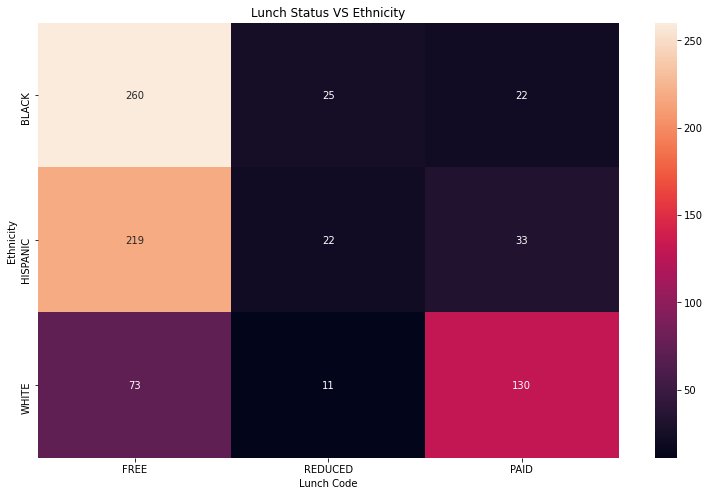

In [360]:
lunch_status = pd.DataFrame(index=obese_data['ethnicity_descr'].unique(), columns=['FREE', 'REDUCED', 'PAID']).fillna(0)

for i, r in obese_data.iterrows():
    lunch_status.loc[r['ethnicity_descr'], r['lunchstatus_descr']] += 1
    
# Heat Map
fig = plt.figure(figsize=(13, 8))
fig = sns.heatmap(lunch_status, annot=True, fmt='d')
title = plt.title('Lunch Status VS Ethnicity')
x_label = plt.xlabel('Lunch Code')
y_label = plt.ylabel('Ethnicity')

There is a strong correlation between minorities and financial assistance that is received for students to have lunch. Most of the students that are Black and Hispanic qualify for either a free lunch or to receive a discount. The data aligns with other, more general statements about health disparities explaining that disparities are closely linked with social, economic, and/or environmental disadvantage and show the effect where groups of people have systematically experienced greater social and/or economic obstacles to health... based on their racial or ethnic group.

The final step is to show the statistics on student's socioeconomic status.

### Data

In [433]:
ses = obese_data.pivot_table(index=['ethnicity_descr', 'ses'], values='student', aggfunc='count').reset_index()

# Add Percentages
e = ses['ethnicity_descr'].unique() # socialeconomic status 
p = [] # List that will store percentages

for i in e:
    p.append(round(ses[ses['ethnicity_descr'] == '{}'.format(i)]['student']/
                  (ses[ses['ethnicity_descr'] == '{}'.format(i)]['student'].sum())*100,
                  2))
    
ses['percentage'] = pd.Series(p).apply(pd.Series).stack().reset_index(drop=True)

### Plot

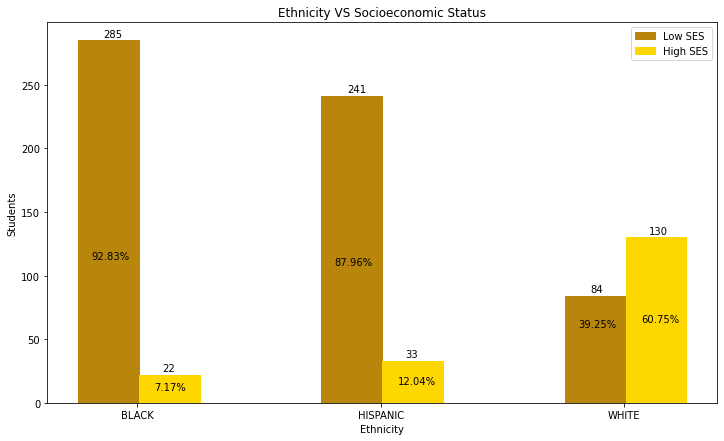

In [436]:
# Create figure
fig = plt.figure(figsize=(12,7))

N = 3
ind = np.arange(N)
width = 0.25

# Data
high_ses = ses[ses['ses'] == 'HIGHSES']['student']
highses_p = ses[ses['ses'] == 'HIGHSES']['percentage']
low_ses = ses[ses['ses'] == 'LOWSES']['student']
lowses_p = ses[ses['ses'] == 'LOWSES']['percentage']

# Plots
plot1 = plt.bar(ind, low_ses, width=width, label='Low SES')
plot2 = plt.bar(ind+width, high_ses, width=width, label='High SES')

# Set colors for each bar
for i in range(0,N):
    plot1[i].set_color('darkgoldenrod')
    plot2[i].set_color('gold')
    
# Show bar values
data = {'high_ses': high_ses, 'highses_p': highses_p, 'low_ses': low_ses, 'lowses_p': lowses_p}
for k, v in data.items():
    if k == 'low_ses':
        for i, v2 in enumerate(data[k]):
            plt.text(i-0.02, v2+3, str(v2))
    if k == 'lowses_p':
        for i, v2 in enumerate(data[k]):
            plt.text(i-0.07, v2+20, str(v2)+'%')
    if k == 'high_ses':
        for i, v2 in enumerate(data[k]):
            plt.text(i+0.22, v2+3, str(v2))
    if k == 'highses_p':
        for i, v2 in enumerate(data[k]):
            plt.text(i+0.19, v2+3, str(v2)+'%')

# Xticks
xticks = plt.xticks([0.12, 1.12, 2.12], ['BLACK', 'HISPANIC', 'WHITE'])

# Add labels
plt.xlabel('Ethnicity')
plt.ylabel('Students')

# title
plt.title('Ethnicity VS Socioeconomic Status')

# Legend
legend = plt.legend()

There were two questions that were asked. **Are children who are obese children more prevalent among certain ethnic groups in Beaufort County?** and **Does the Socioeconomic status have any correlation to having a higher prevalence of obesity?** Looking at this data set it shows, the Black and Hispanic student population have a higher prevalence of obesity. It also shows that socioeconomic status is an attributing factor. **92.83%** of Black children and **87.96%** of Hispanic children that are obese have a low socioeconomic status. There are several things that could explain why this is. It could be that minority populations could have higher unemployment rates, high level of food insecurity, poor access to health care, or greater access to poor quality food. It is interesting to see this data set correlate with statements on CDC on racial and ethnic disparities in obesity.